In [68]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns


In [13]:
df = pd.read_csv("/Users/mehrabmahdian/projects/enose/EDA-Electronic-Nose/Data/data.csv")
df.head()

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135,label
0,54,82,79,19,70,36,63,61,493,Banana D1
1,61,80,80,20,65,33,64,60,501,Banana D1
2,55,82,75,16,67,35,65,61,496,Banana D1
3,58,81,76,16,67,32,60,58,498,Banana D1
4,56,79,77,19,65,34,63,63,496,Banana D1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202692 entries, 0 to 202691
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   MQ2     202692 non-null  int64 
 1   MQ3     202692 non-null  int64 
 2   MQ4     202692 non-null  int64 
 3   MQ5     202692 non-null  int64 
 4   MQ6     202692 non-null  int64 
 5   MQ7     202692 non-null  int64 
 6   MQ8     202692 non-null  int64 
 7   MQ9     202692 non-null  int64 
 8   MQ135   202692 non-null  int64 
 9   label   202692 non-null  object
dtypes: int64(9), object(1)
memory usage: 15.5+ MB


In [60]:
#df.isnull().sum()


In [21]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]

X = StandardScaler().fit_transform(X)        

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)

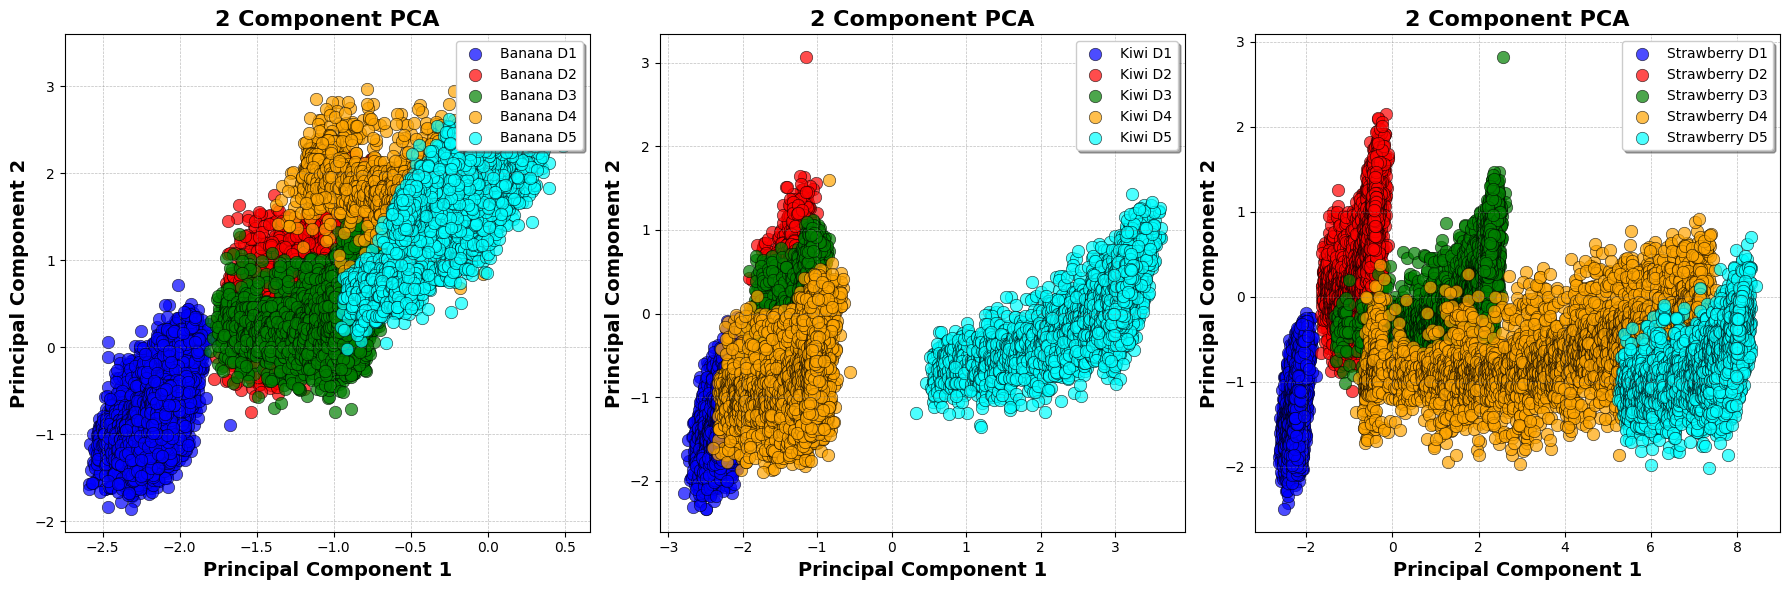

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

label_lists = [['Banana D1', 'Banana D2', 'Banana D3', 'Banana D4', 'Banana D5'],
               ['Kiwi D1', 'Kiwi D2', 'Kiwi D3', 'Kiwi D4', 'Kiwi D5'],
               ['Strawberry D1', 'Strawberry D2', 'Strawberry D3', 'Strawberry D4', 'Strawberry D5']]

colors = [['blue', 'red', 'green', 'orange', 'cyan'],
          ['blue', 'red', 'green', 'orange', 'cyan'],
          ['blue', 'red', 'green', 'orange', 'cyan']]

common_xlabel = 'Principal Component 1'
common_ylabel = 'Principal Component 2'
common_title = '2 Component PCA'

for ax, labels, color_list in zip(axes, label_lists, colors):
    ax.set_xlabel(common_xlabel, fontsize=14, fontweight='bold', color='black')
    ax.set_ylabel(common_ylabel, fontsize=14, fontweight='bold', color='black')
    ax.set_title(common_title, fontsize=16, fontweight='bold', color='black')

    for label, color in zip(labels, color_list):
        indicesToKeep = finalDf['label'] == label
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   c=color,
                   s=80, alpha=0.7, edgecolors='k', linewidth=0.5, label=label)

    ax.legend(loc='upper right', fontsize=10, shadow=True, fancybox=True)

    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()

plt.show()
